# Predicting Employee Attrition

---

##### By Sienna Alcala

Dataset: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

### Problem

Employees are a companies greatest resource. The Coronavirus Pandemic has forced numerous changes in the workplace and companies are losing employees because of it. 

### Solution

Use classification algorithms to predict whether or not an employee is likely to churn. Use these predictions to intervene with potential

## Project

### Libraries

Import necessary libraries to begin analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv("EmployeeAttrition.csv")

## Exploratory Data Analysis

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

#### Target Class Distribution

In [4]:
attrition = df[(df['Attrition'] == 'Yes')].copy()
no_attrition = df[(df['Attrition'] == 'No')].copy()
attr = attrition.value_counts().sum() /  df.value_counts().sum()
no_attr = no_attrition.value_counts().sum() /  df.value_counts().sum()
print('Data shows a class imbalance with only', '{:.2%}'.format(attr), 'of values belonging to the target class')

Data shows a class imbalance with only 16.12% of values belonging to the target class


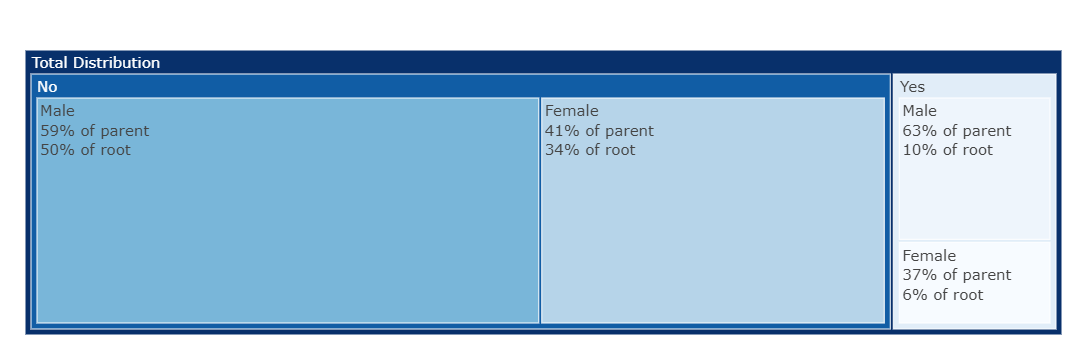

In [5]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.treemap(df, path=[px.Constant("Total Distribution"), 'Attrition', 'Gender'])
fig.update_traces(marker_colorscale = 'Blues',textinfo = "label+percent parent+percent root", pathbar_textfont_size=15)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), uniformtext=dict(minsize=15, mode='show'))
fig.show()

This treemap shows that overall, 6% of Females and 10% of Males churned.

## Data Cleaning & Pre-Processing

#### Zero Variance Check

In [6]:
df.nunique().nsmallest(10)

EmployeeCount        1
Over18               1
StandardHours        1
Attrition            2
Gender               2
OverTime             2
PerformanceRating    2
BusinessTravel       3
Department           3
MaritalStatus        3
dtype: int64

In [7]:
df.nunique().nlargest(10)

EmployeeNumber        1470
MonthlyRate           1427
MonthlyIncome         1349
DailyRate              886
HourlyRate              71
Age                     43
TotalWorkingYears       40
YearsAtCompany          37
DistanceFromHome        29
YearsInCurrentRole      19
dtype: int64

Remove values that do not offer any value to the analysis

In [8]:
df.drop(['StandardHours', 'EmployeeCount', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

#### Check for Missing Values

In [9]:
df.isnull().sum().nlargest(5)

Age               0
Attrition         0
BusinessTravel    0
DailyRate         0
Department        0
dtype: int64

## Analyze Features

### Heatmaps

In [10]:
corrmat = df.corr()

<AxesSubplot:>

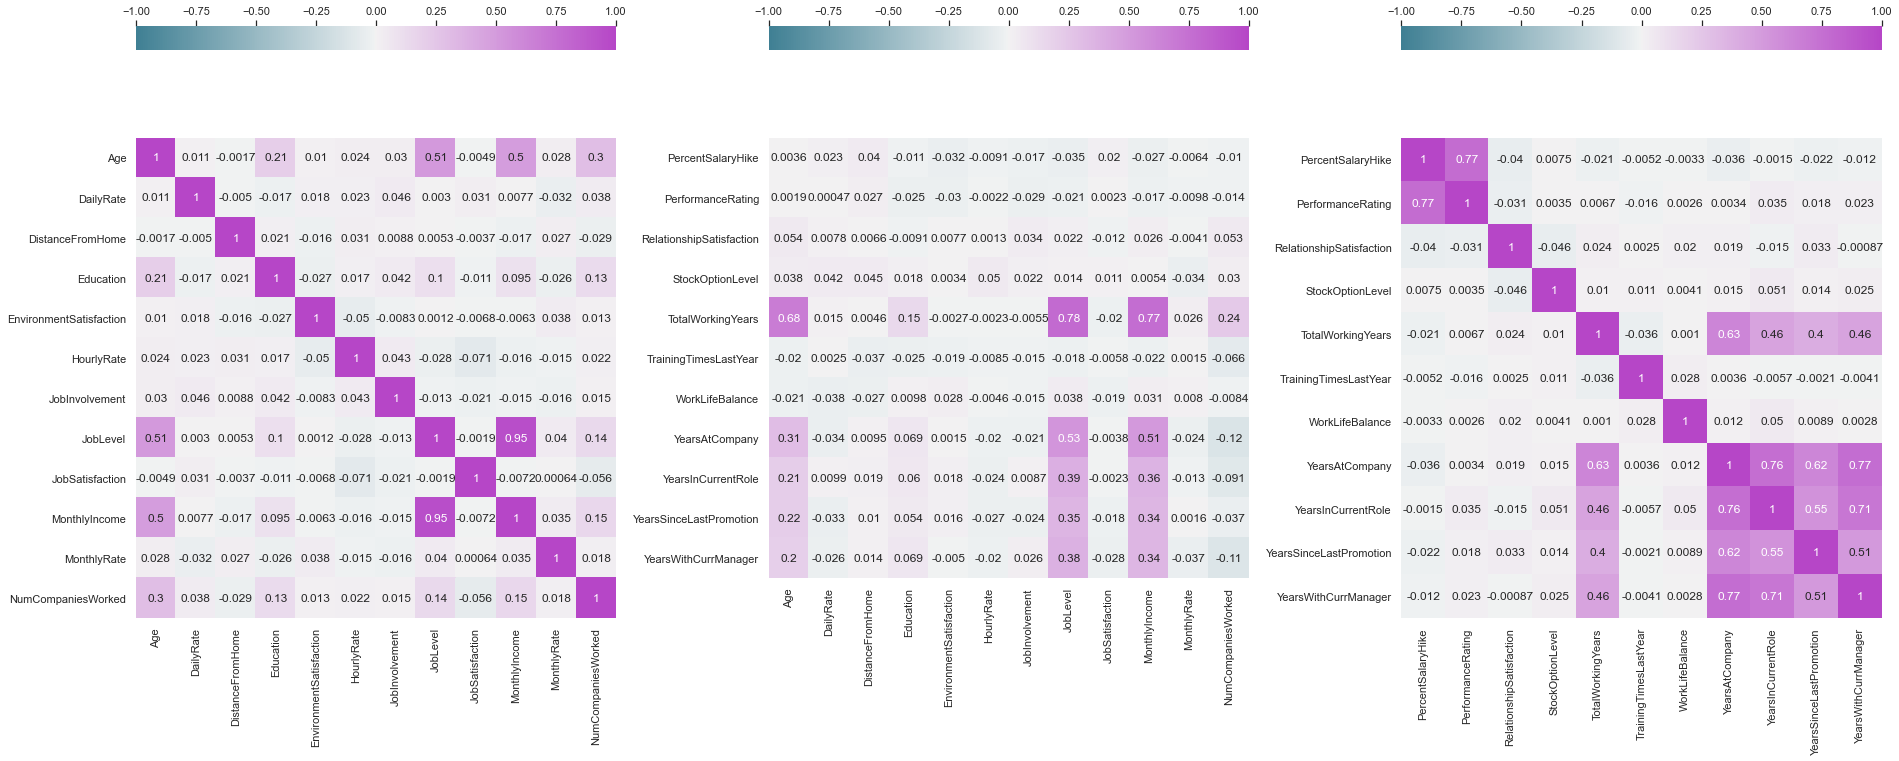

In [11]:
h1 = corrmat.loc['Age':'NumCompaniesWorked', 'Age':'NumCompaniesWorked']
h2 = corrmat.loc['PercentSalaryHike':, 'Age':'NumCompaniesWorked']
h3 = corrmat.loc['PercentSalaryHike':, 'PercentSalaryHike':]
fig = plt.figure(figsize=(25,25))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
fig.tight_layout(h_pad=0, w_pad=12)
sns.heatmap(h1, ax=ax1, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 300, n=256),square=True, cbar_kws = dict(use_gridspec=False,location="top"), annot=True, annot_kws={'fontsize': 12})
sns.heatmap(h2,ax =ax2, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 300, n=256),square=True, cbar_kws = dict(use_gridspec=False,location="top"), annot=True, annot_kws={'fontsize': 12})
sns.heatmap(h3,ax=ax3, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 300, n=256),square=True, cbar_kws = dict(use_gridspec=False,location="top"), annot=True, annot_kws={'fontsize': 12})

##### High Correlations:
-  JobLevel and MonthlyIncome  
-  TotalWorkingYears and JobLevel
-  TotalWorkingYears and MonthlyIncome
-  PercentSalaryHike and PerformanceRating
-  YearsInCurrentRole and YearsAtCompany
-  YearsWithCurrManager and YearsAtCompany

### Remove Feature Multicollinierity

In [12]:
threshold = 0.75
abs_corr_matrix = corrmat.abs()
upper = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to consider removing :' % (len(to_drop)), to_drop)

There are 5 columns to consider removing : ['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']


In [13]:
df_final = df.drop(['JobLevel','TotalWorkingYears','YearsInCurrentRole', 'YearsWithCurrManager' , 'PerformanceRating'], axis=1).copy()
df_final.columns[:]

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

## Encode Categorical Variables

In [14]:
categorical = []
for col, value in df_final.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

numerical = df_final.columns.difference(categorical)

In [15]:
catvars = df_final[categorical].copy()
catvars = catvars.drop(['Attrition'], axis=1)
catvars = pd.get_dummies(catvars)

numvars = df_final[numerical].copy()
encoded_df = pd.concat([numvars, catvars], axis=1)
encoded_df.head(3)

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   

   HourlyRate  JobInvolvement  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0          94               3                4           5993        19479   
1          61               2                2           5130        24907   
2          92               2                3           2090         2396   

   ...  JobRole_Manufacturing Director  JobRole_Research Director  \
0  ...                               0                          0   
1  ...                               0                          0   
2  ...                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                      0                     1            0             1  
1                      1                     0            1             0  
2                      0                     1            0             1  

[3 rows x 46 columns]

## Map Target Variable

In [16]:
target_map = {'Yes':1, 'No':0}
target = df_final['Attrition'].apply(lambda x: target_map[x]).copy()
features = list(encoded_df.columns)[:]


## Feature Importances

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

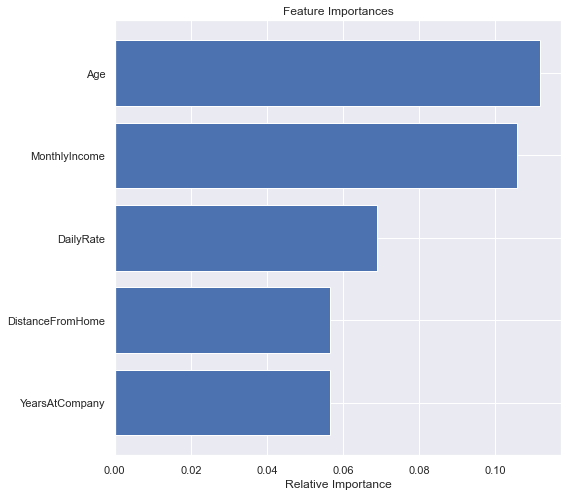

In [18]:
seed = 4373
X = encoded_df[features]
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)
num_features = 5 

plt.figure(figsize=(8,8))
plt.title('Feature Importances')

plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()


## Compare Algorithms

In [19]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from simple_colors import *


In [20]:
# prepare configuration for cross validation test harness
seed = 4373
# prepare models
models = []

models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=10000)))
models.append(('DT', DecisionTreeClassifier(max_depth=6)))
models.append(('RF', RandomForestClassifier(max_depth=6)))
models.append(('Ada', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier(eval_metric='logloss')))
models.append(('NB', GaussianNB()))
models.append(('KMeans', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=5000)))

Due to the large class imbalance of the dataset, we will be utilizing synthetic data augmentation to create new minority class samples; specifically the Synthetic Minority Over-Sampling Technique (SMOTE). 

In [21]:
# evaluate each model in turn
results = []
fittedmodels = []
names = []
scoring =('accuracy','roc_auc','recall','precision','f1')
for name, model in models:
    pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=seed)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', model]])
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_validate(pipeline, X_train, y_train, cv=kfold, scoring=scoring, return_estimator=True)
    results.append(cv_results['test_f1'])
    names.append(name)
    fittedmodels.append(cv_results['estimator'])
    print(black(name, ['bold', 'underlined']))
    print("Accuracy: {:.3f}".format(cv_results['test_accuracy'].mean()))
    print("Roc_Auc: {:.3f}".format(cv_results['test_roc_auc'].mean()))
    print("Recall: {:.3f}".format(cv_results['test_recall'].mean()))
    print("Precision: {:.3f}".format(cv_results['test_precision'].mean()))
    print("F1: {:.3f}".format(cv_results['test_f1'].mean()))
    print('='*50)

LR
Accuracy: 0.871
Roc_Auc: 0.827
Recall: 0.410
Precision: 0.678
F1: 0.503
DT
Accuracy: 0.774
Roc_Auc: 0.669
Recall: 0.429
Precision: 0.342
F1: 0.377
RF
Accuracy: 0.870
Roc_Auc: 0.799
Recall: 0.386
Precision: 0.697
F1: 0.490
Ada
Accuracy: 0.845
Roc_Auc: 0.800
Recall: 0.523
Precision: 0.537
F1: 0.525
XGB
Accuracy: 0.860
Roc_Auc: 0.791
Recall: 0.351
Precision: 0.644
F1: 0.450
NB
Accuracy: 0.554
Roc_Auc: 0.690
Recall: 0.732
Precision: 0.229
F1: 0.349
KMeans
Accuracy: 0.810
Roc_Auc: 0.666
Recall: 0.266
Precision: 0.381
F1: 0.311
LDA
Accuracy: 0.861
Roc_Auc: 0.820
Recall: 0.244
Precision: 0.755
F1: 0.360
MLP
Accuracy: 0.836
Roc_Auc: 0.764
Recall: 0.429
Precision: 0.508
F1: 0.459


One of the tradeoffs of SMOTE includes an improved Precision score, at the expense of Recall.

## Visualizations

In [22]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay, auc

In [23]:
LR_fitted = fittedmodels[0]
DT_fitted = fittedmodels[1]
RF_fitted = fittedmodels[2]
Ada_fitted = fittedmodels[3]
XGB_fitted = fittedmodels[4]
NB_fitted = fittedmodels[5]
KMeans_fitted = fittedmodels[6]
LDA_fitted = fittedmodels[7]
MLP_fitted = fittedmodels[8]

modelfits = [('LR',LR_fitted), ('DT',DT_fitted),('RF',RF_fitted),('Ada',Ada_fitted),('XGB',XGB_fitted), ('NB',NB_fitted),('KMeans',KMeans_fitted),('LDA',LDA_fitted),('MLP',MLP_fitted)]

LR


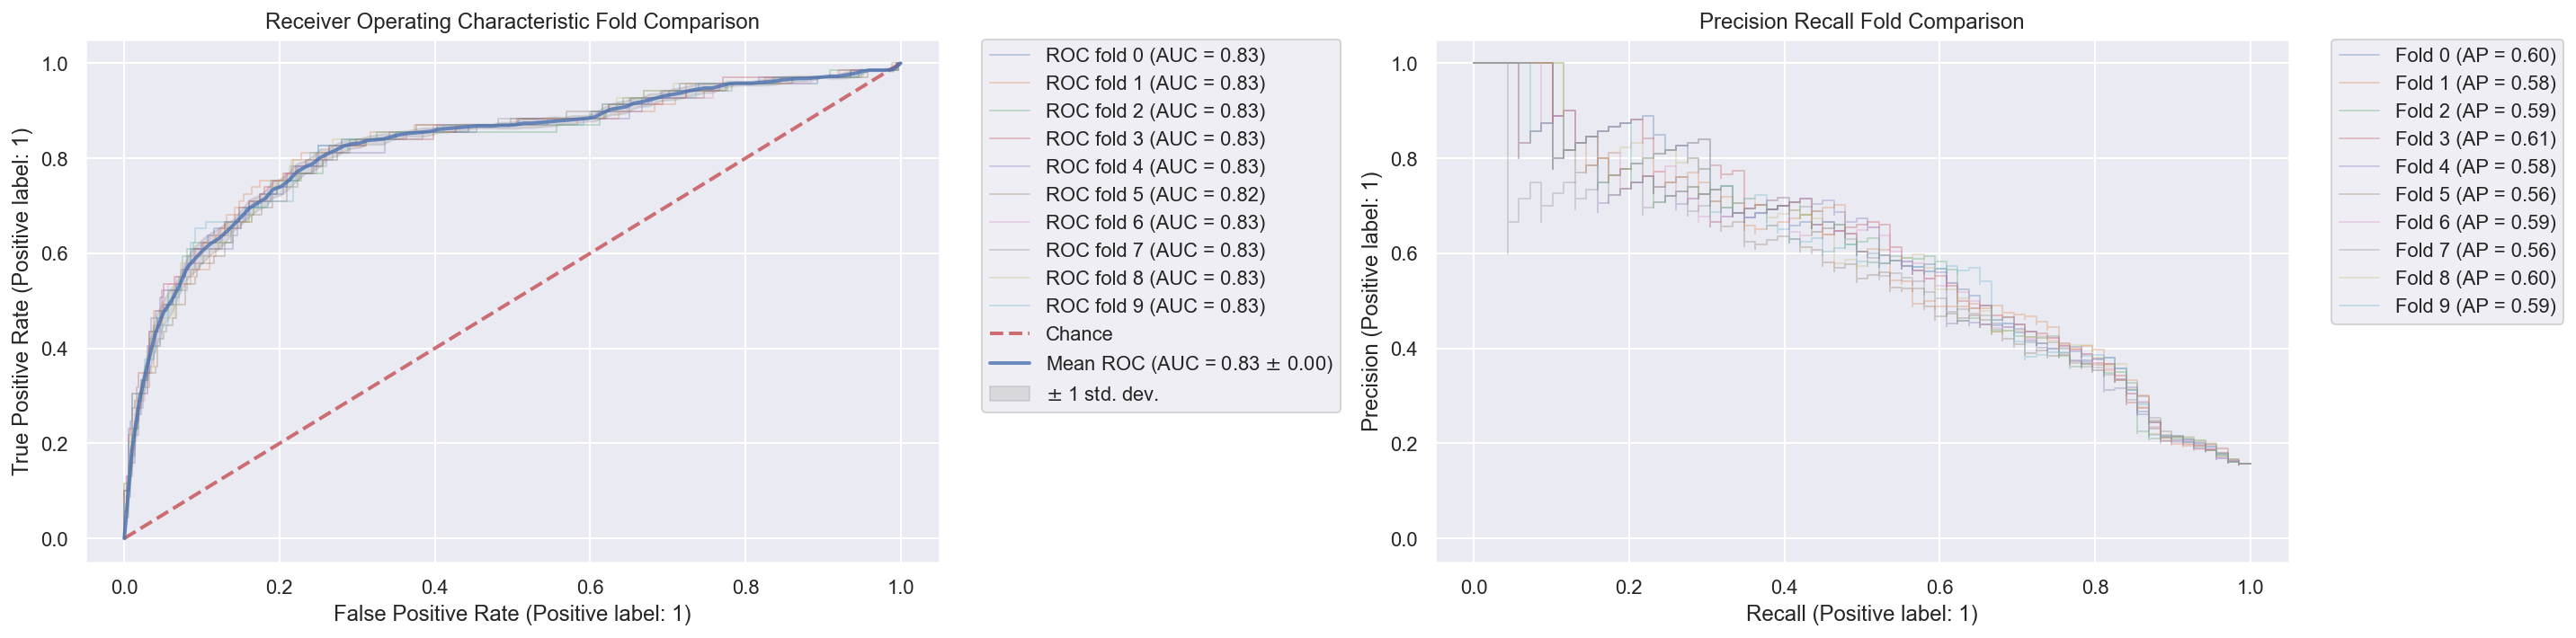

DT


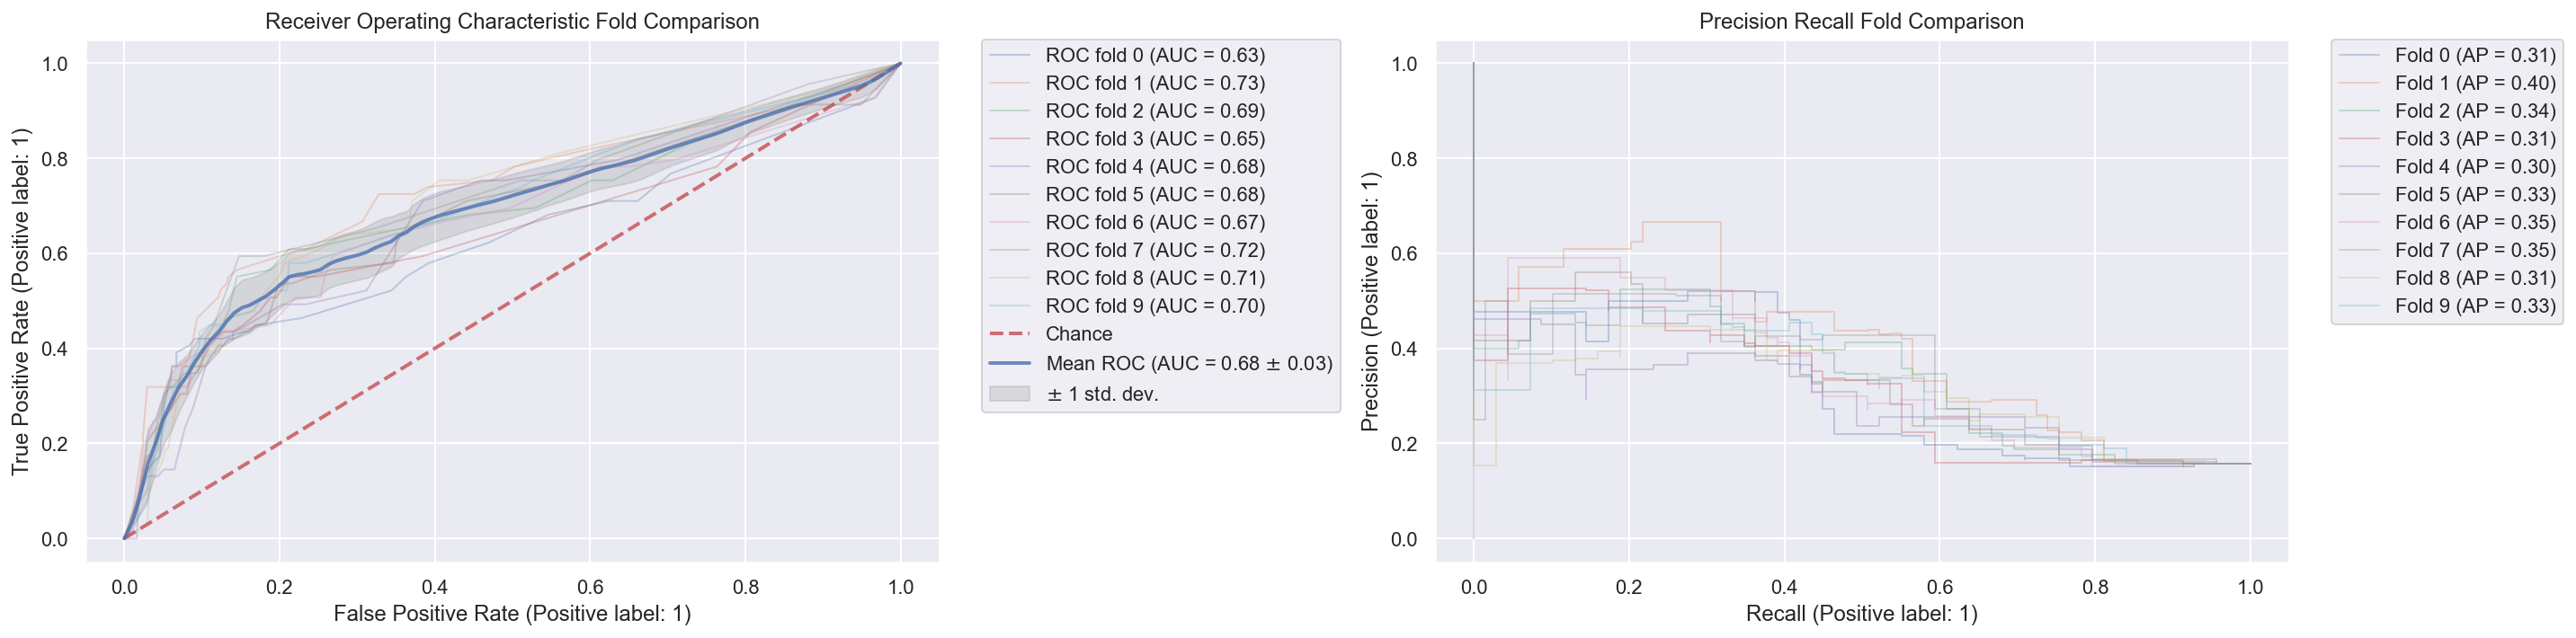

RF


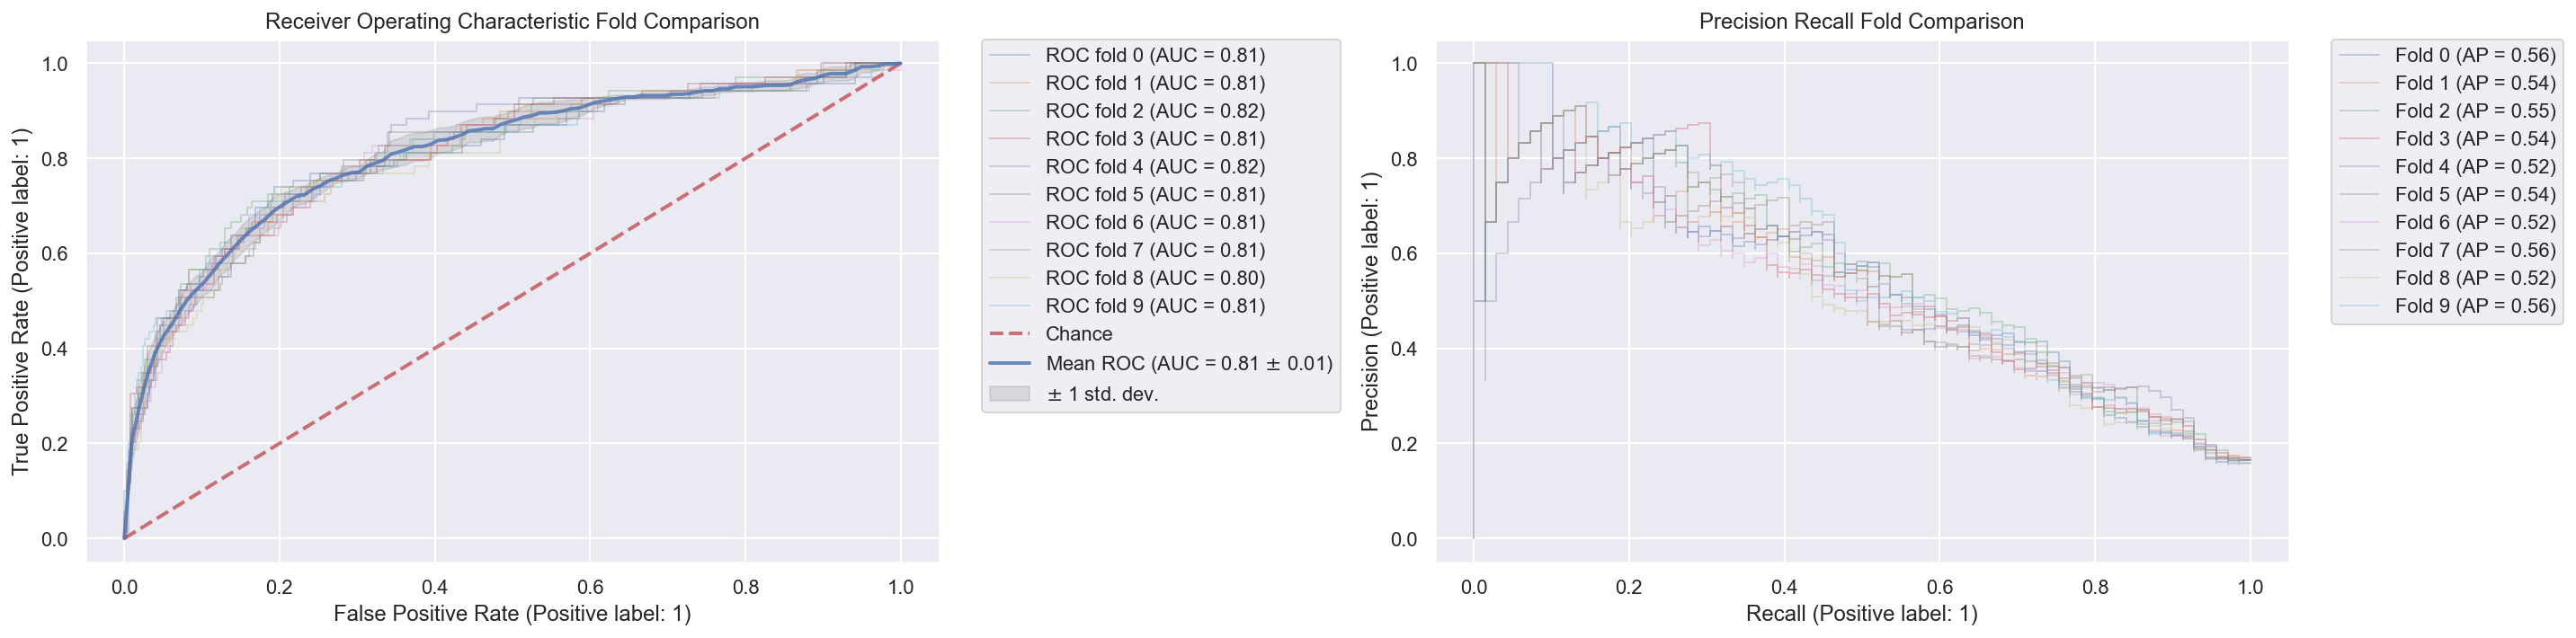

Ada


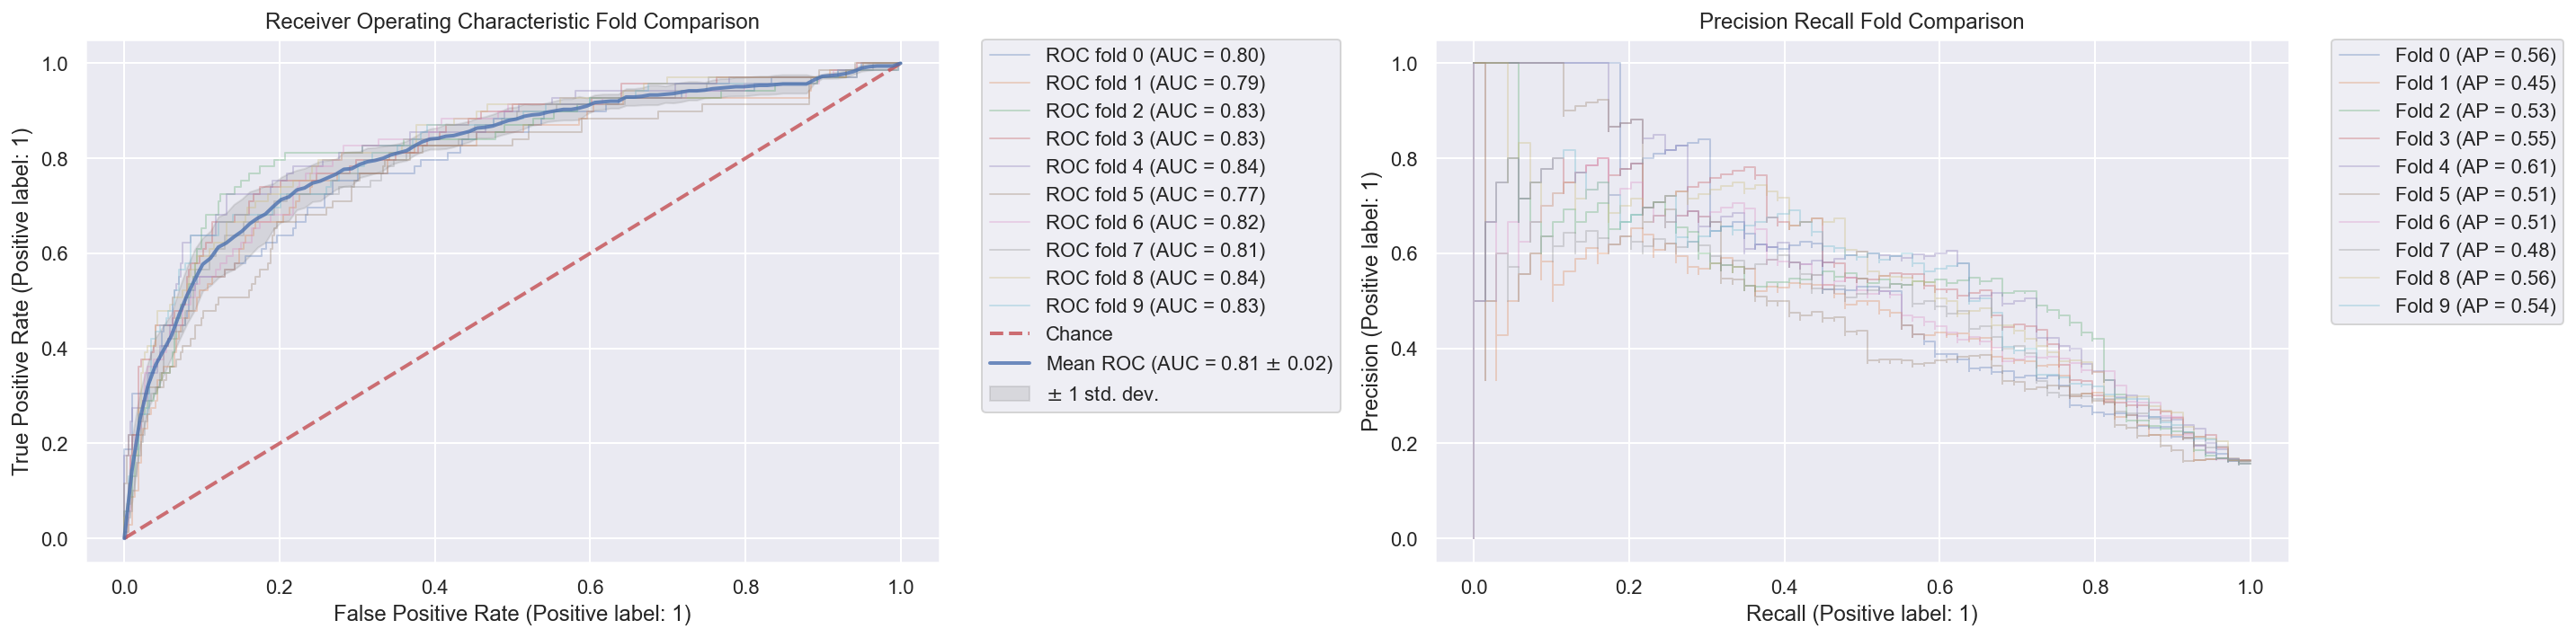

XGB


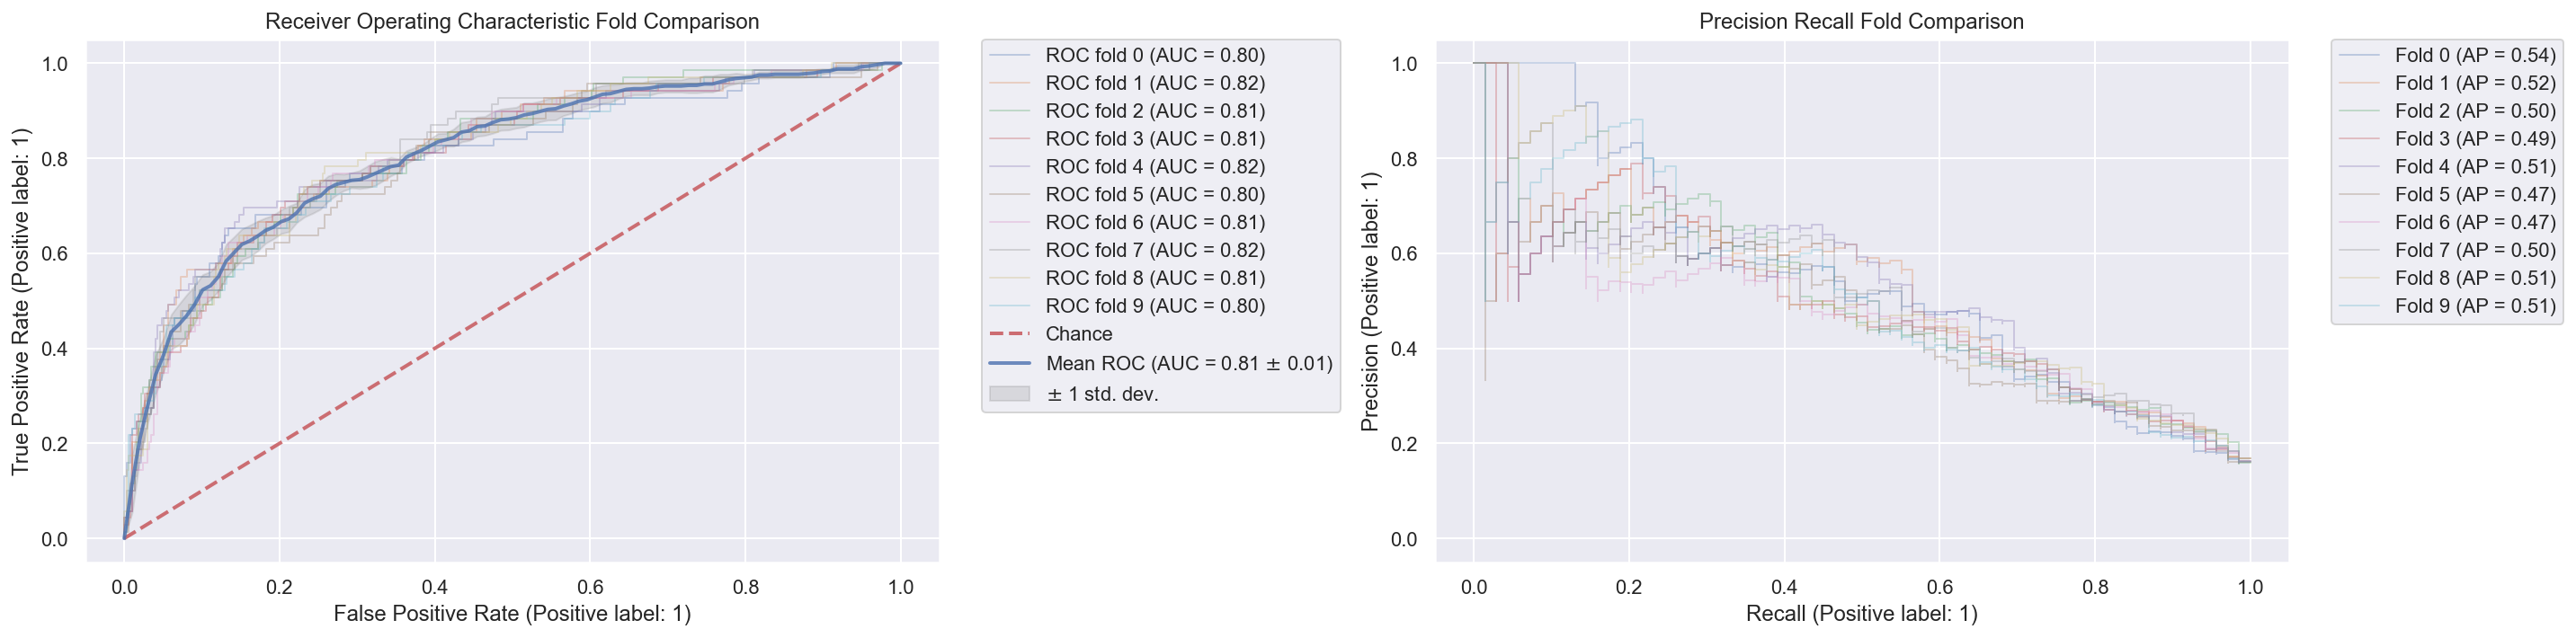

NB


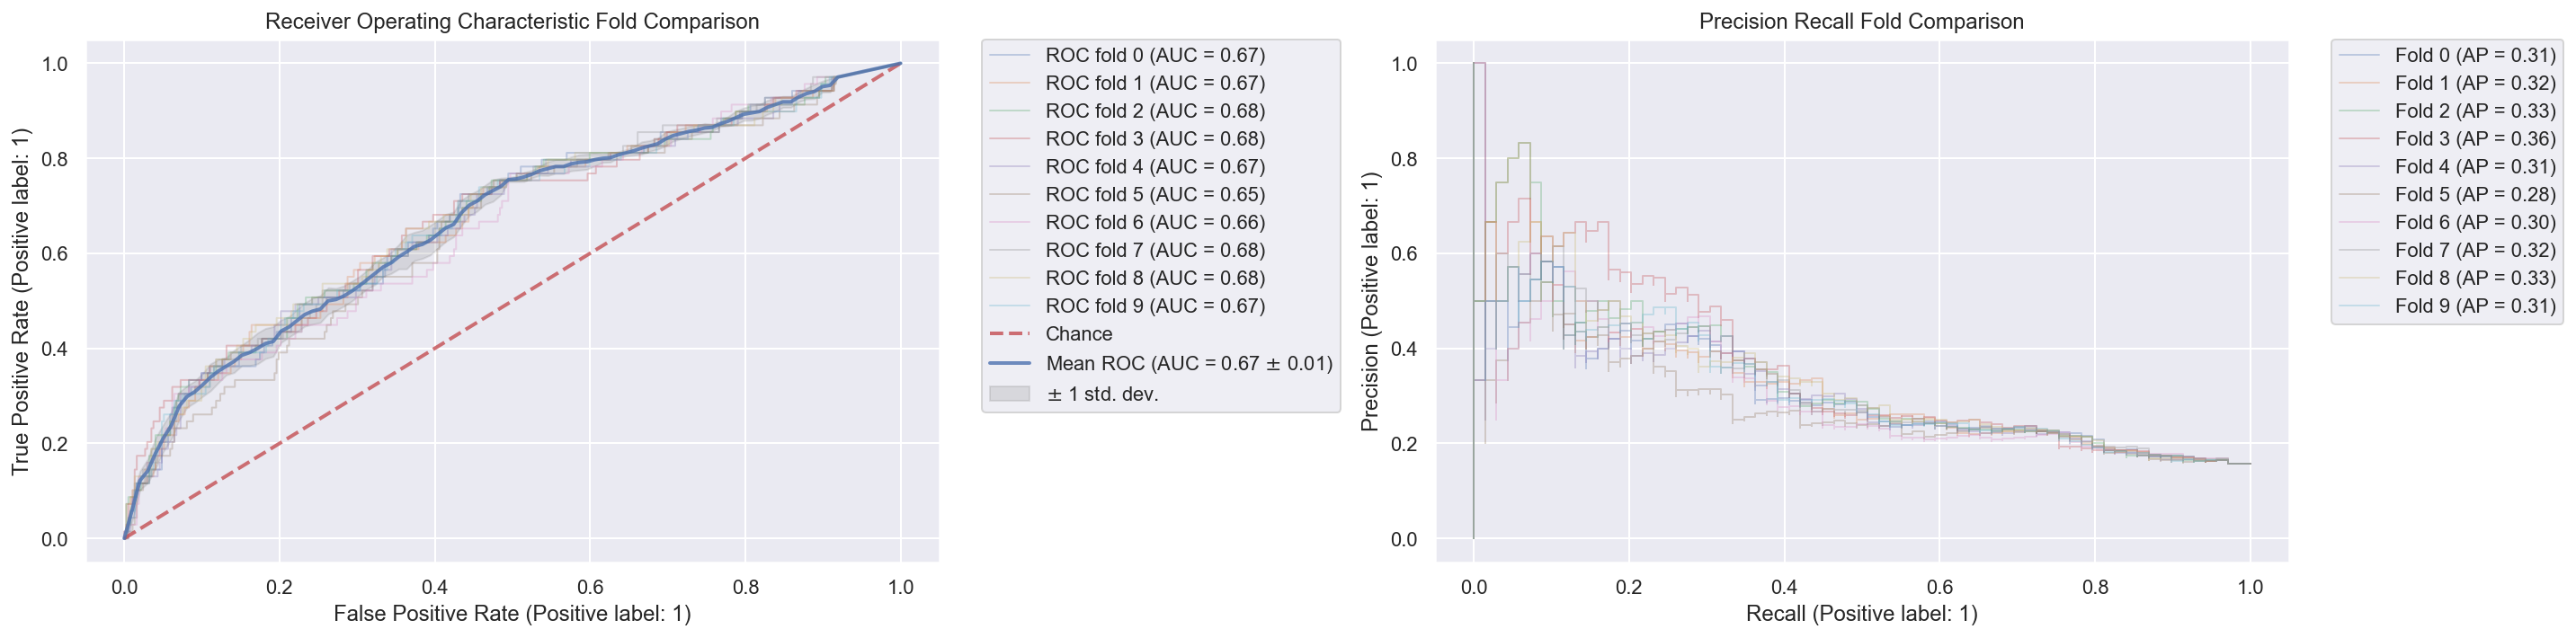

KMeans


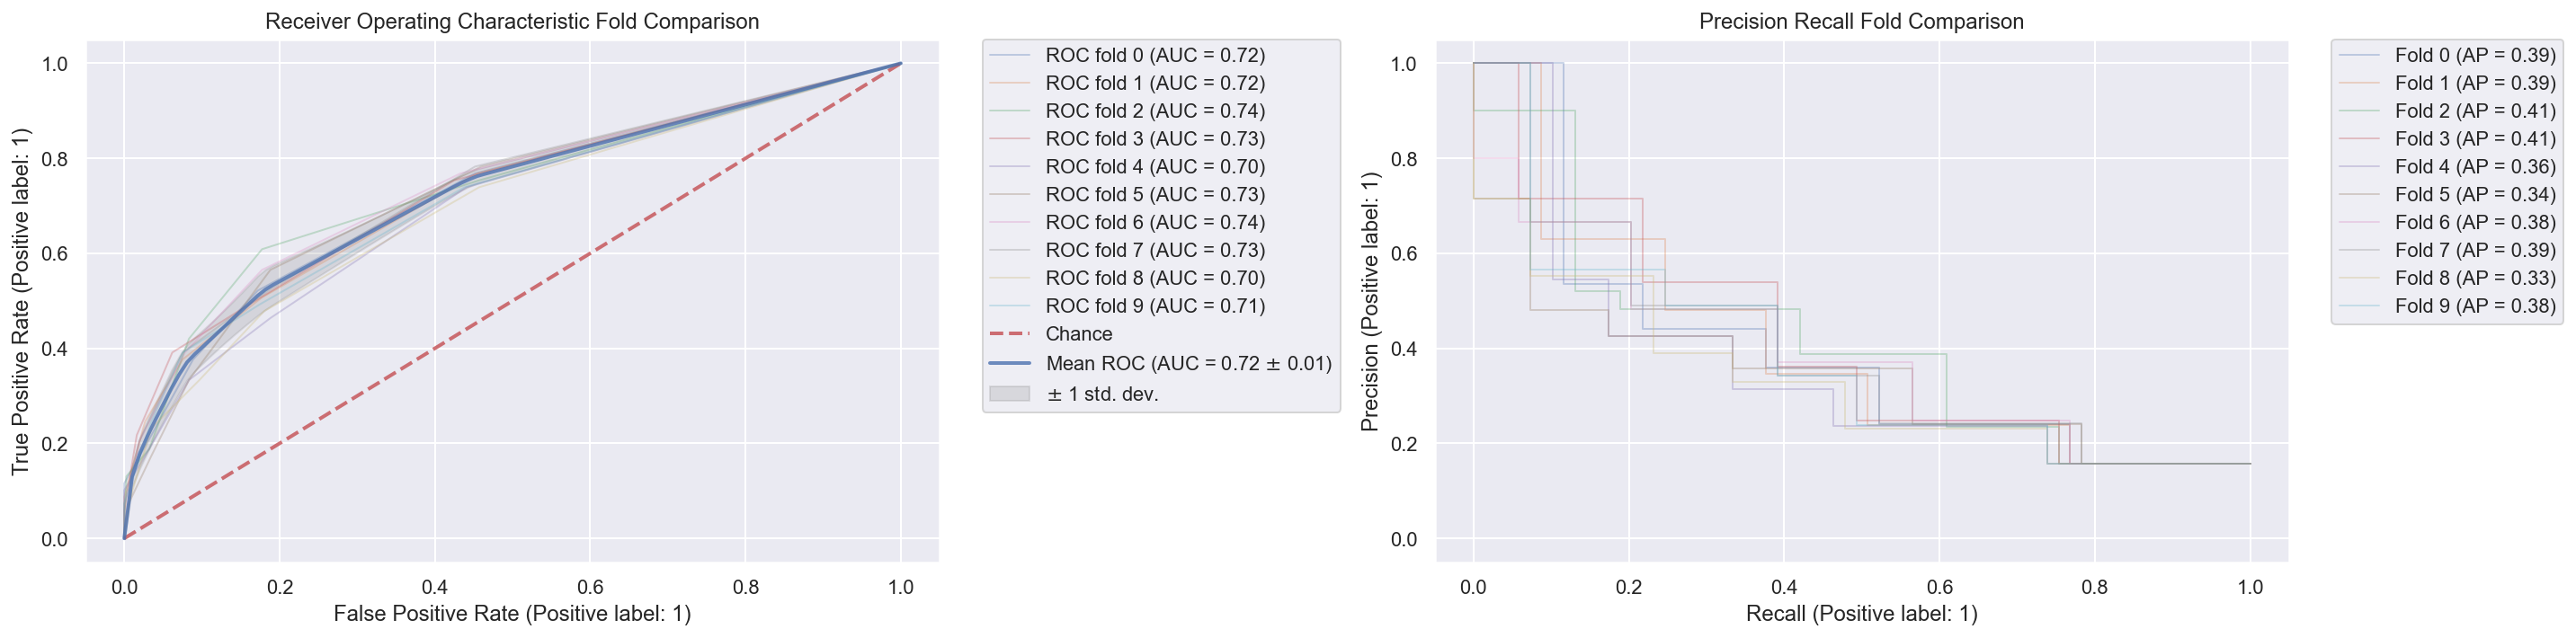

LDA


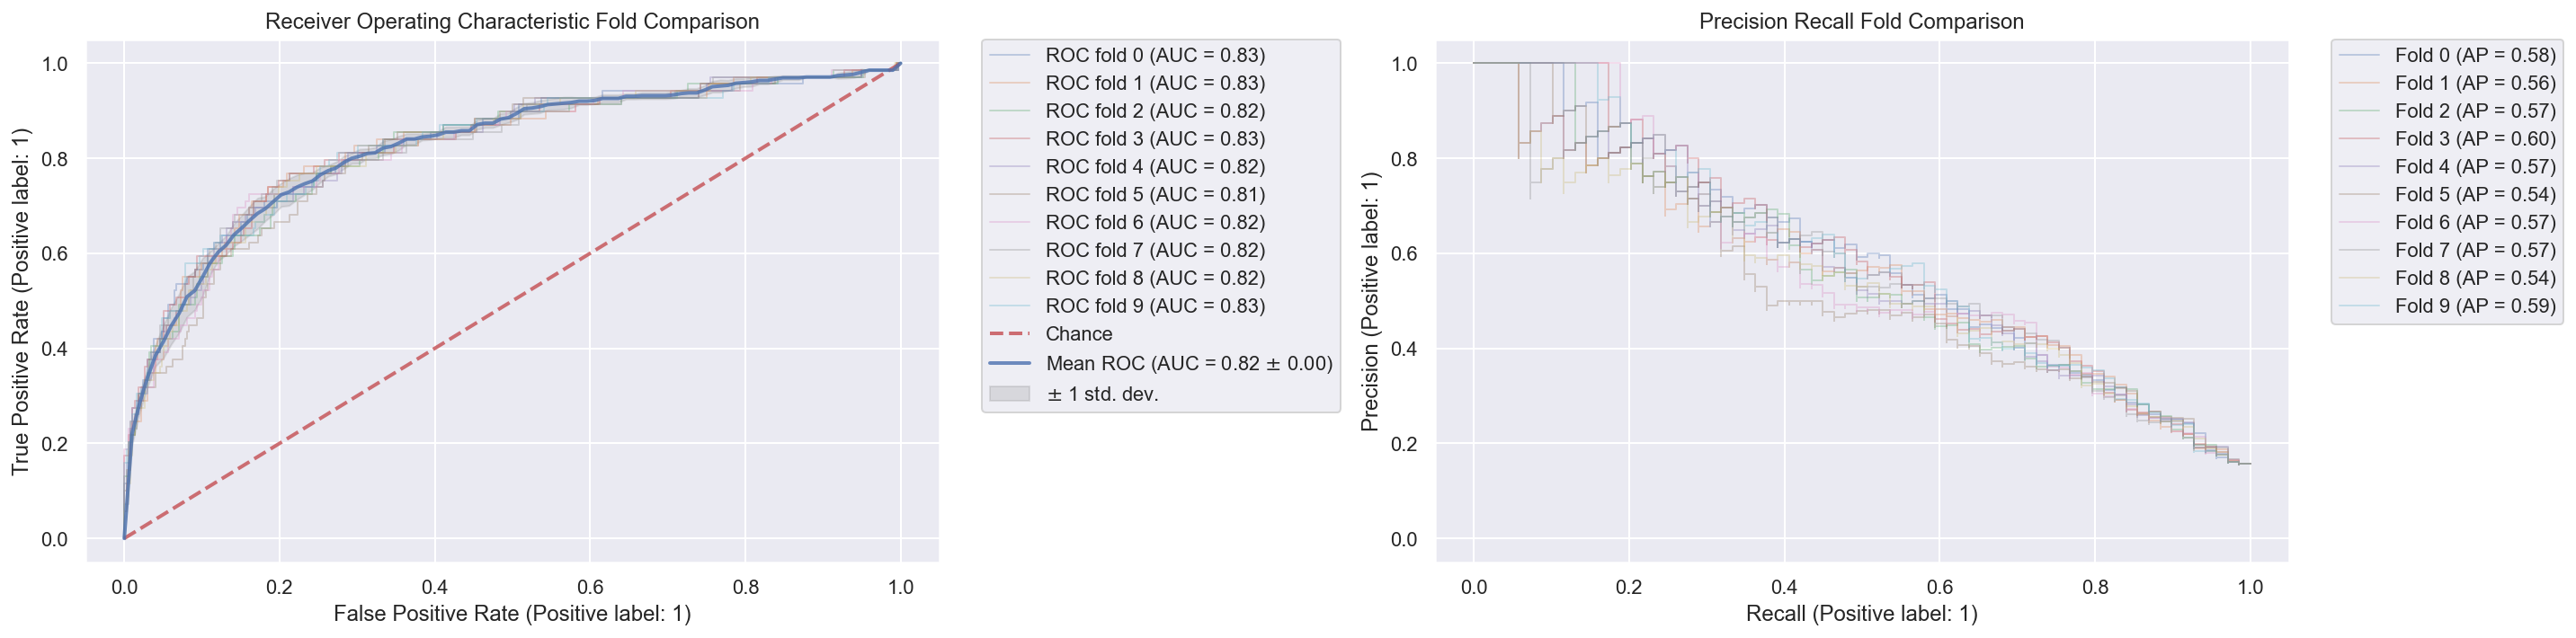

MLP


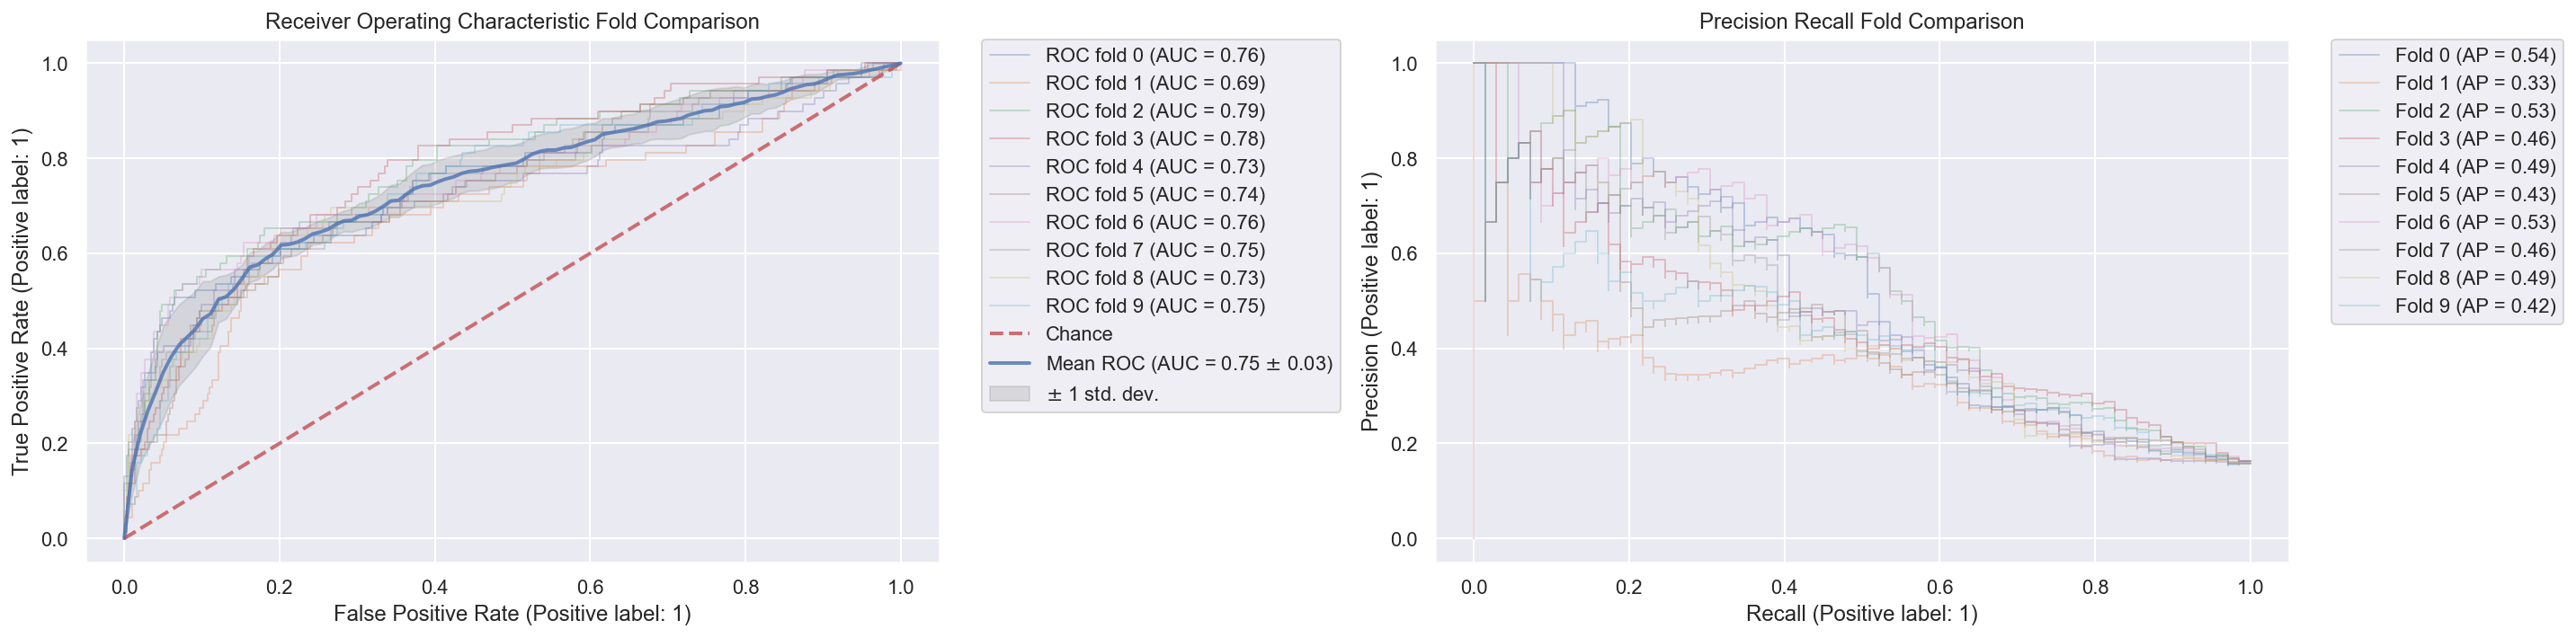

In [24]:
%config InlineBackend.figure_format = 'retina'  

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
for name, model in modelfits:
    print(black(name, ['bold', 'underlined']))
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    for i, fittedmodel in enumerate(model):
        viz = RocCurveDisplay.from_estimator(
            fittedmodel,
            X_test,
            y_test,
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax1,
        )
        viz2 = PrecisionRecallDisplay.from_estimator(
            fittedmodel,
            X_test,
            y_test,
            name="Fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax2,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax1.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver Operating Characteristic Fold Comparison",
    )
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        

    ax2.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Precision Recall Fold Comparison",
    )
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig.tight_layout()
    plt.show()

#### Boxplot Algorithm Comparison using Plotly

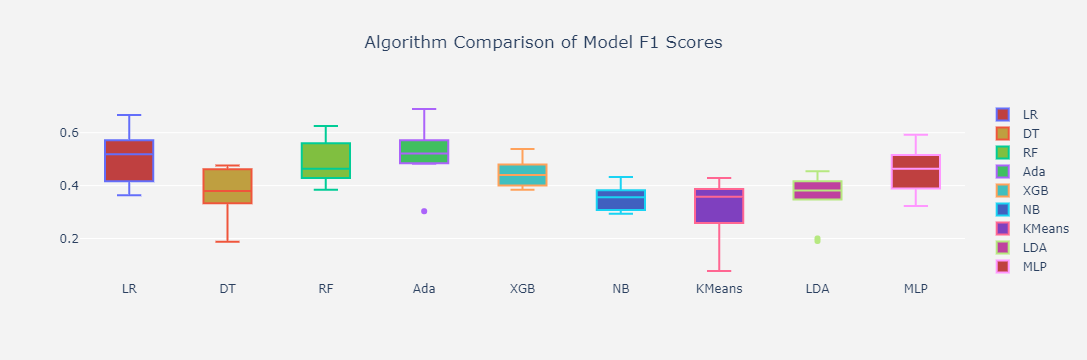

In [25]:
import plotly.graph_objects as go

X_data = names
N = 9
y_data = results

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

fig = go.Figure()

for Xd, yd, cls in zip(X_data, y_data, c):
        fig.add_trace(go.Box(
            y=yd,
            name=Xd,
            fillcolor=cls,
            )
        )

fig.update_layout(
    title={
        'text': 'Algorithm Comparison of Model F1 Scores',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)'
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=True
)
fig.show()


## Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
models2tune = []

models2tune.append(('LR', LogisticRegression(max_iter=10000)))
models2tune.append(('RF', RandomForestClassifier(max_depth = 6)))
models2tune.append(('Ada', AdaBoostClassifier()))
models2tune.append(('XGB', XGBClassifier(eval_metric='logloss')))
models2tune.append(('LDA', LinearDiscriminantAnalysis()))

In [28]:
params = [{'classifier__solver':['lbfgs', 'liblinear'], 'classifier__penalty': ['l2'], 'classifier__C': np.logspace(-3,3,20)}, 
          {'classifier__criterion': ['gini', 'entropy'], 'classifier__n_estimators': [200, 700], 'classifier__max_features': ['sqrt', 'log2']},
          {'classifier__n_estimators': [100, 200],'classifier__learning_rate': [0.01, 0.1, .2, .5]},
          {'classifier__max_depth': [1, 3, 5, 6], 'classifier__n_estimators': [60, 100, 200], 'classifier__learning_rate': [0.1, 0.01, 0.05, .2]},
          {'classifier__solver': ['svd', 'lsqr', 'eigen']}]


score={'AUC':'roc_auc', 
           'RECALL':'recall',
           'PRECISION':'precision',
           'F1':'f1'}

# evaluate each model in turn
names = []
for param, classifier in zip(params, models2tune):
    print("Working on...")
    print(black(classifier[0], ['bold', 'underlined']))
    pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=seed)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', classifier[1]]])
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
    grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param,
                           scoring=score,
                           cv=kfold,
                           n_jobs=-1,
                           refit='AUC',
                           return_train_score=True,
                              error_score='raise') 
    
    grid_search.fit(X_train, y_train)
    cv_score = grid_search.best_score_
    test_score = grid_search.score(X_test, y_test)
    print("Best parameter for {} is {}".format(classifier[0], grid_search.best_params_))
    print("Best 'Roc_Auc'` for {} is {}".format(classifier[0], grid_search.best_score_))
    print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
    print('='*50)
    print('\n')

    

Working on...
LR
Best parameter for LR is {'classifier__C': 1000.0, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best 'Roc_Auc'` for LR is 0.8334445807192162
Cross-validation score: 0.8334445807192162
Test score: 0.8328658251519402


Working on...
RF
Best parameter for RF is {'classifier__criterion': 'entropy', 'classifier__max_features': 'log2', 'classifier__n_estimators': 200}
Best 'Roc_Auc'` for RF is 0.8188976091639543
Cross-validation score: 0.8188976091639543
Test score: 0.8099189652485586


Working on...
Ada
Best parameter for Ada is {'classifier__learning_rate': 0.2, 'classifier__n_estimators': 200}
Best 'Roc_Auc'` for Ada is 0.8264419410506785
Cross-validation score: 0.8264419410506785
Test score: 0.8221910550101292


Working on...
XGB
Best parameter for XGB is {'classifier__learning_rate': 0.2, 'classifier__max_depth': 1, 'classifier__n_estimators': 200}
Best 'Roc_Auc'` for XGB is 0.828702710033492
Cross-validation score: 0.828702710033492
Test score: 0.8387096